In [1]:
import matplotlib.pyplot as plt
from finite_volume.advection import AdvectionSolver

/usr/local/Caskroom/miniconda/base/envs/fv-env/lib/python3.11/site-packages/numba/core/decorators.py:282: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


In [5]:
shared_config = dict(
    u0="square",
    n=(16,),
    v=(2, 1),
    flux_strategy="gauss-legendre",
    apriori_limiting=True,
    mpp_lite=True,
    courant=0.166,
    PAD=(0, 1),
    load=False,
    save=False,
)

high_order_solver = AdvectionSolver(
    **shared_config,
    order=4,
)

high_order_solver.rk4()
print(high_order_solver.abs_min, high_order_solver.abs_max)

New solution instance...


100%|██████████| 1.0/1.0 [00:01]                  


0.0 1.0


In [2]:
for p in range(8):
    for flux_strategy in ["gauss-legendre", "transverse"]:
        shared_config = dict(
            u0="square",
            n=(16,),
            v=(2, 1),
            flux_strategy="transverse",
            PAD=(0, 1),
            load=False,
            save=False,
        )

        high_order_solver = AdvectionSolver(
            **shared_config,
            order=p + 1,
        )

        high_order_solver.udot(high_order_solver.u0)

In [3]:
# print(high_order_solver.abs_min)
# print(high_order_solver.abs_max)

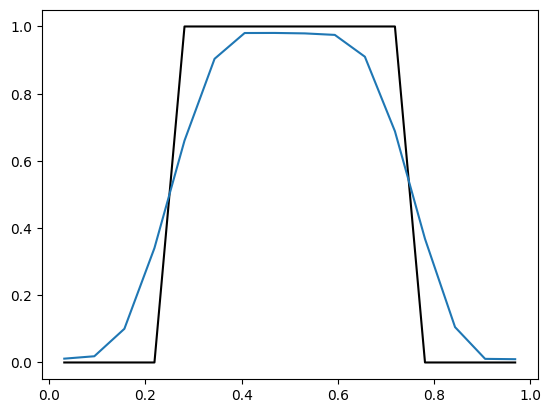

In [6]:
# plt.plot(high_order_solver.x, high_order_solver.u_snapshots[0][1], "k")
# plt.plot(first_order_solver.x, first_order_solver.u_snapshots[-1][1])
# plt.plot(high_order_solver.x, high_order_solver.u_snapshots[-1][1])
plt.plot(
    high_order_solver.x,
    high_order_solver.u_snapshots[0][1][shared_config["n"][0] // 2, :],
    "k",
)
plt.plot(
    high_order_solver.x,
    high_order_solver.u_snapshots[-1][1][shared_config["n"][0] // 2, :],
)